# The Complexity of Life Mimicked
3d printing of fractals

distinct fractals surfaces

6 fractal plates form a landscape plate 16x24x6 inch *

# Fractal Generation
create 3d fractals

# Fractal to Fractal Plate

# STL from fractal

# Visualize
pass to blender

# Fractal 1 - Octahedron flakes
A spiky surface of infinitely paurus pyrameids 

### Small Pyramid complete

In [1]:
from stl import mesh
import math
import numpy


vectors = numpy.array([
[
    [1, 1, 0],
    [1, -1, 0],
    [0, 0, 1]
],                         
                           [
    [1, -1, 0],
    [-1, -1, 0],
    [0, 0, 1]
],                               
                 [
    [-1, -1, 0],
    [-1, 1, 0],
    [0, 0, 1]
],          
                           [
    [-1, 1, 0],
    [1, 1, 0],
    [0, 0, 1]
],                                    
    
                               [
    [-1, 1, 0],
    [1, 1, 0],
    [1, -1, 0],
],   
                               [
    [-1, 1, 0],
    [1, -1, 0],
    [-1, -1, 0]
],   
])

spike_x = 2
spike_y = 2
distribution = 2
num_spikes = spike_x * spike_y
spikes = vectors.copy()
for x in range(spike_x):
    for y in range(spike_y):
        if x == 0 and y == 0:
            continue
        spike = vectors.copy()
        for vertex in spike:
            for point in vertex:
                point[0] += x * distribution
                point[1] += y * distribution
        spikes = numpy.concatenate([spikes, spike])

top_spike = vectors.copy()
for vertex in top_spike:
    for point in vertex:
        point[0] += 0.5 * distribution
        point[1] += 0.5* distribution
        point[2] += 1
spikes = numpy.concatenate([spikes, top_spike])
        
        
data = numpy.zeros(len(spikes), dtype=mesh.Mesh.dtype)
my_mesh = mesh.Mesh(data)

# x y z
data['vectors'] = spikes

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  del sys.path[0]


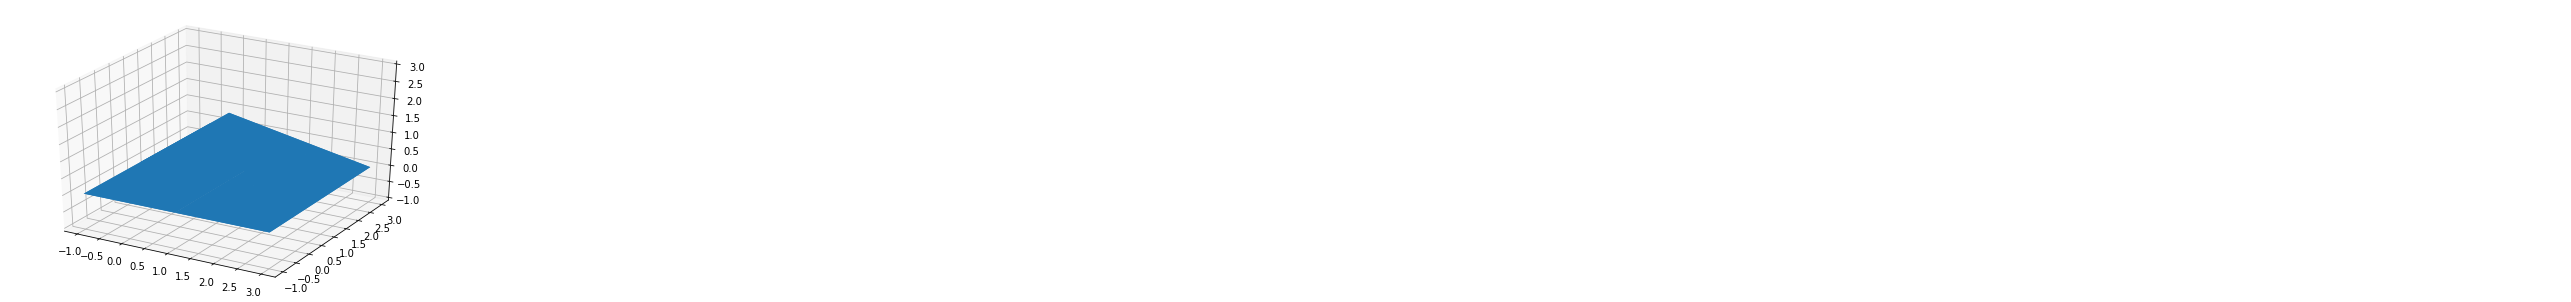

In [2]:
from matplotlib import pyplot
from mpl_toolkits import mplot3d

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)


# Render the cube faces
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(my_mesh.vectors))

# Auto scale to the mesh size
scale = numpy.concatenate(my_mesh).flatten(-1)
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

my_mesh.save('spiky_surface.stl')

### Big Pyramid

In [3]:
spikes_copy = spikes.copy()
len(spikes_copy)

30

In [20]:


def recursice_extend(starter, starter_scale, max_scale):
    scale = starter_scale
    vertexes = starter.copy()
    
    translations = numpy.array([
        [1,1,-1],
        [1,-1,-1],
        [-1, 1,-1],
        [-1,-1,-1]
    ]
    )
    
    while scale < max_scale:
        print(scale, len(vertexes))
        # copy prev pyramid four times translated down and to each corner
        # add all pyramids together 
        seed = vertexes.copy()
        for translation in translations:
            duplicate = seed.copy()
            duplicate += translation * scale
            vertexes = numpy.concatenate([vertexes, duplicate])
        scale = scale * 2
    
    return vertexes
            
big_pyramid = recursice_extend(spikes_copy, 2, 20)


data = numpy.zeros(len(big_pyramid), dtype=mesh.Mesh.dtype)
my_mesh = mesh.Mesh(data)

# x y z
data['vectors'] = big_pyramid

2 30
4 150
8 750
16 3750


In [21]:
len(big_pyramid)

18750

In [22]:
big_pyramid

array([[[  1,   1,   0],
        [  1,  -1,   0],
        [  0,   0,   1]],

       [[  1,  -1,   0],
        [ -1,  -1,   0],
        [  0,   0,   1]],

       [[ -1,  -1,   0],
        [ -1,   1,   0],
        [  0,   0,   1]],

       ...,

       [[-30, -28, -29],
        [-28, -28, -29],
        [-29, -29, -28]],

       [[-30, -28, -29],
        [-28, -28, -29],
        [-28, -30, -29]],

       [[-30, -28, -29],
        [-28, -30, -29],
        [-30, -30, -29]]])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  del sys.path[0]


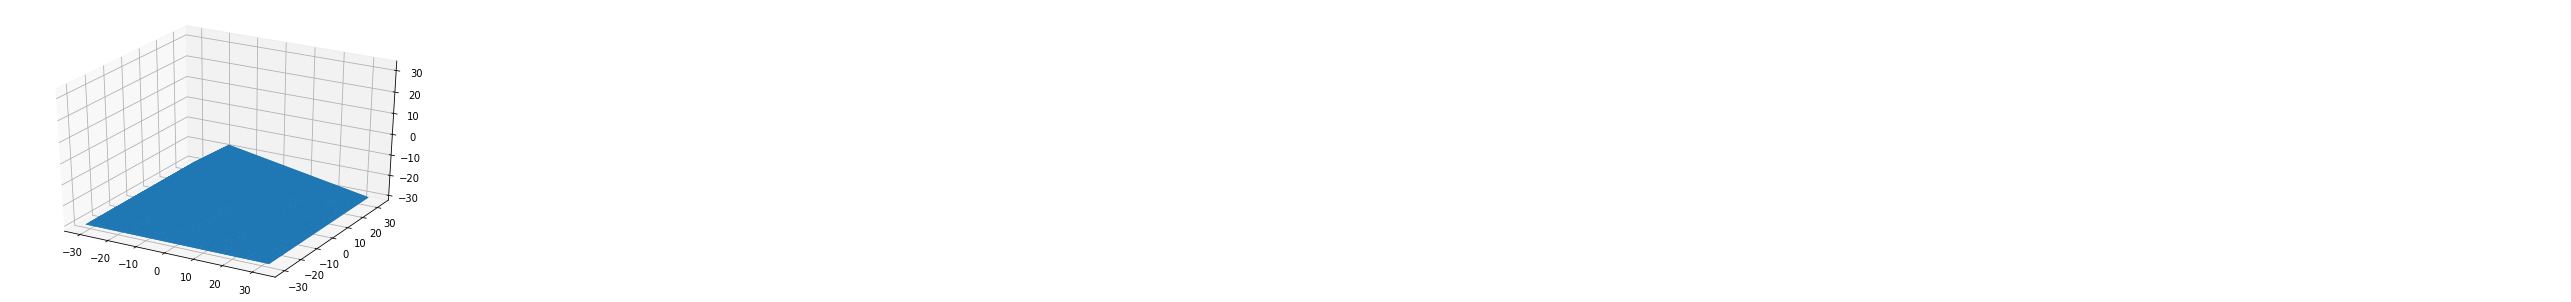

In [23]:
from matplotlib import pyplot
from mpl_toolkits import mplot3d

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)


# Render the cube faces
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(my_mesh.vectors))

# Auto scale to the mesh size
scale = numpy.concatenate(my_mesh).flatten(-1)
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

my_mesh.save('big_pyramid.stl')

### Complete Octahedron flakes